# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# Enrich Your Confusion Matrix With A Sankey Diagram

Post Link: [Substack](https://avichawla.substack.com/p/enrich-your-confusion-matrix-with)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:ugcPost:7060539000415019008)

Twitter Post: [Twitter](https://twitter.com/_avichawla/status/1654773329452990465)

In [1]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go

In [3]:
RED = "rgba(245,173,168,0.6)"
GREEN = "rgba(211,255,216,0.6)"

In [4]:
def create_df_from_confusion_matrix(confusion_matrix, class_labels=None):
    
    
    ## create a dataframe
    if not len(class_labels):
        ## if class labels not received, created dummy headers and index
        df = pd.DataFrame(data=confusion_matrix, 
                          index=[f"True Class-{i+1}" for i in range(confusion_matrix.shape[0])],
                          columns=[f"Predicted Class-{i+1}" for i in range(confusion_matrix.shape[0])])
    else:
        ## create headers and index using class labels
        df = pd.DataFrame(data=confusion_matrix, 
                          index=[f"True {i}" for i in class_labels],
                          columns=[f"Predicted {i}" for i in class_labels])
    
    ## unpivot dataframe and rename columns
    df = df.stack().reset_index()
    df.rename(columns={0:'instances', 'level_0':'actual', 'level_1':'predicted'}, inplace=True)
    """
    >>> df
            actual          predicted     instances
          True Fraud    Predicted Fraud       10
          True Fraud    Predicted Legit       4
          True Legit    Predicted Fraud       2
          True Legit    Predicted Legit       12
    
    """
    
    ## determine classification color based on correct classification or not.
    df["colour"] = df.apply(lambda x: 
                               GREEN if x.actual.split()[1:] == x.predicted.split()[1:] 
                               else RED, axis=1)

    node_labels = pd.concat([df.actual, df.predicted]).unique()
    node_labels_indices = {label:index for index, label in enumerate(node_labels)}
    
    ## map actual and predicted columns to numbers
    df =  df.assign(actual    = df.actual.apply(lambda x: node_labels_indices[x]),
                    predicted = df.predicted.apply(lambda x: node_labels_indices[x]))
    
    ## determine text for hovering on connecting edges of sankey diagram
    def get_link_text(row):
        if row["colour"] == GREEN:
            instance_count = row["instances"]
            source_class = ' '.join(node_labels[row['actual']].split()[1:])
            target_class = ' '.join(node_labels[row['predicted']].split()[1:])
            return f"{instance_count} {source_class} instances correctly classified as {target_class}"
        else:
            instance_count = row["instances"]
            source_class = ' '.join(node_labels[row['actual']].split()[1:])
            target_class = ' '.join(node_labels[row['predicted']].split()[1:])
            return f"{instance_count} {source_class} instances incorrectly classified as {target_class}"
        
    df["link_text"] = df.apply(get_link_text, axis = 1)
    return df, node_labels
    

def plot_confusion_matrix_as_sankey(confusion_matrix,  class_labels = None):
    
    """
    plots sankey diagram from confusion matrix and class labels
    
    The function acceps:
        - confusion_matrix
                [[TP, FN]
                 [FP, TN]]
        - class_labels:
            class_labels[0]: Label for positive class
            class_labels[1]: Label for negative class
        
    """
    
    df, labels = create_df_from_confusion_matrix(confusion_matrix,  class_labels)
    
    fig = go.Figure(data=[go.Sankey(
    
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "gray", width = 1.0),
      label = labels,
      hovertemplate = "%{label} has total %{value:d} instances<extra></extra>"
    ),
    link = dict(
      source = df.actual, 
      target = df.predicted,
      value = df.instances,
      color = df.colour,
      customdata = df['link_text'], 
      hovertemplate = "%{customdata}<extra></extra>"  
    ))])

    fig.update_layout(title_text="Confusion Matrix Sankey Diagram", font_size=15,
                      width=500, height=400)
    
    return fig

In [8]:
confusion_matrix = np.array([[10, 4],
                             [2, 20]])

plot_confusion_matrix_as_sankey(confusion_matrix,  ['Fraud', 'Legit'])

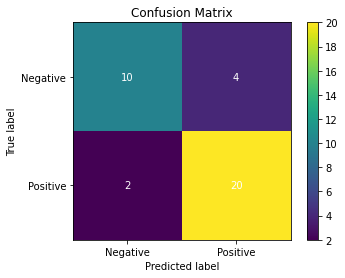

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix
confusion_matrix = np.array([[10, 4], [2, 20]])

# Define the class labels
class_names = ['Negative', 'Positive']

# Create the figure and axes objects
fig, ax = plt.subplots()

# Create the heatmap of the confusion matrix
im = ax.imshow(confusion_matrix, cmap='viridis')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show all ticks
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))

# Label ticks with the respective class names
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Set axis labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')

# Loop over the data and add text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha='center', va='center', color='white')

# Show the figure
plt.show()


In [12]:
confusion_matrix

array([[10,  4],
       [ 2, 20]])